# Check $a_w$ and $b_{b,w}$ for L23

In [2]:
# imports
from importlib import reload
import numpy as np
import pandas
import datetime

from matplotlib import pyplot as plt

import seaborn as sns

from oceancolor.hydrolight import loisel23
from oceancolor.water import absorption
from oceancolor.water import scattering
from oceancolor.utils import spectra as spec_utils

In [3]:
%matplotlib ipympl

# Defs

In [26]:
def plot_IOP(wv, IOP, lbl, clr=None, GSFC=None):
    fig = plt.figure(figsize=(6,6))
    plt.clf()
    ax = plt.gca()
    ax.plot(wv, IOP, color=clr, label=lbl)
    #
    if GSFC is not None:
        ax.plot(GSFC[0], GSFC[1], label='GSFC RSR')
        ax.legend()
        ax.set_xlim(wv.min(), wv.max())
        ax.set_ylim(0., IOP.max())
    #
    ax.set_xlabel('Wavelength (nm)')
    ax.set_ylabel(f'{lbl}'+r'(m$^{-1}$)')
    plt.show()

# Load

## Load L23

In [4]:
l23_ds = loisel23.load_ds(4,0)

In [5]:
l23_dsIOP.min(), 

<xarray.Dataset>
Dimensions:  (Lambda: 81, IOP_Scenario: 3320)
Coordinates:
  * Lambda   (Lambda) float32 350.0 355.0 360.0 365.0 ... 740.0 745.0 750.0
Dimensions without coordinates: IOP_Scenario
Data variables: (12/17)
    Rrs      (IOP_Scenario, Lambda) float32 0.01176 0.01201 ... 3.041e-05
    Ed_0+    (IOP_Scenario, Lambda) float32 0.7753 0.7314 0.7207 ... 1.237 1.222
    Lw       (IOP_Scenario, Lambda) float32 0.009118 0.008785 ... 3.716e-05
    Lu_0+    (IOP_Scenario, Lambda) float32 0.04075 0.03903 ... 0.06316 0.0624
    a        (IOP_Scenario, Lambda) float32 0.03096 0.02925 ... 2.83 2.85
    anw      (IOP_Scenario, Lambda) float32 0.02386 0.02245 ... 0.0005 0.0004
    ...       ...
    bph      (IOP_Scenario, Lambda) float32 0.04521 0.04454 ... 0.1013 0.1008
    bd       (IOP_Scenario, Lambda) float32 0.03323 0.03239 ... 0.03532 0.03513
    bb       (IOP_Scenario, Lambda) float32 0.006968 0.006587 ... 0.001876
    bbnw     (IOP_Scenario, Lambda) float32 0.00105 0.001028 ... 0.001641
    bbph     (IOP_Scenario, Lambda) float32 0.0004521 0.0004454 ... 0.001008
    bbd      (IOP_Scenario, Lambda) float32 0.0005982 0.000583 ... 0.0006324

In [15]:
wave = l23_ds.Lambda.data

## GSFC RSR

In [29]:
df_gsfc = absorption.load_rsr_gsfc()
df_gsfc.head()

,wavelength,aw,bw
0,200.0,3.070,0.1510
1,201.0,2.962,0.1478
2,202.0,2.854,0.1446
3,203.0,2.746,0.1414
4,204.0,2.638,0.1382


# Generate $a_w$

In [10]:
idx = 500

In [11]:
a_w = l23_ds.a.data[idx] - l23_ds.anw.data[idx]
a_w.shape

(81,)

## Plot

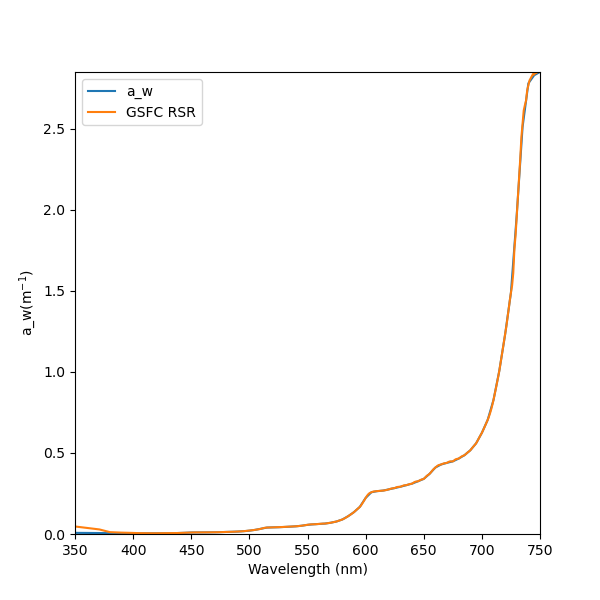

In [30]:
plot_IOP(wave, a_w, 'a_w', GSFC=(df_gsfc.wavelength, df_gsfc.aw))

# Now $b_b$

In [28]:
b_b_w = l23_ds.bb.data[idx] - l23_ds.bbnw.data[idx]

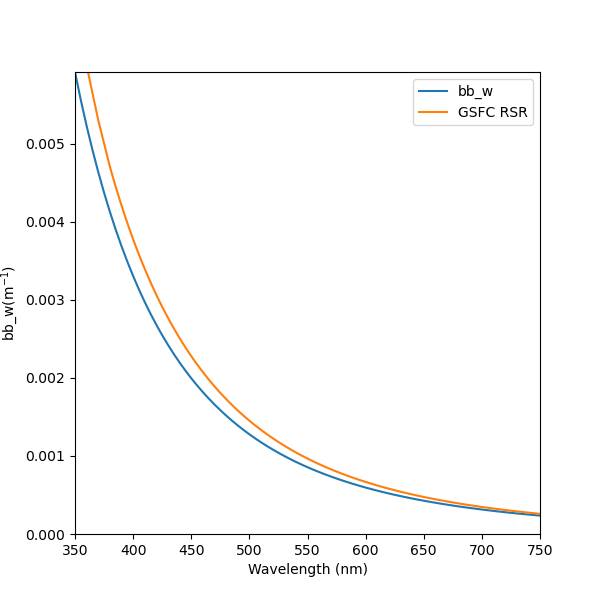

In [31]:
plot_IOP(wave, b_b_w, 'bb_w', GSFC=(df_gsfc.wavelength, 0.5*df_gsfc.bw))